In [47]:
import pandas as pd
import seaborn as sns
import datetime
import math

## Summary

> This notebook shows that the gas dataset contain too many errors and must thus be discard: 
* Timestamps are not represented in the standard format (int).
* Gas counter reset several times.
* There is no clear sensing frequency pattern


## Datasets General Characteristics

In [91]:
df = pd.read_csv("data/gas.csv")

### Schema

In [92]:
df.head()

,Timestamp,Gas
0,1.533214e+09,0
1,1.533267e+09,40
2,1.533284e+09,57
3,1.533284e+09,58
4,1.533284e+09,59


Sensor reads gas in cubic meters. 

Note that timestamps are float numbers. This is not the standard behavior. Let's trunc them and convert timestamp to int values.

In [93]:
df['Timestamp'] = df['Timestamp'].apply(math.floor)
df.head()

,Timestamp,Gas
0,1533214444,0
1,1533266645,40
2,1533283572,57
3,1533283580,58
4,1533283589,59


### Empty values

In [94]:
df.isnull().sum()

Timestamp    0
Gas          0
dtype: int64

The original dataset does not contain empty values.

### Duration

In [95]:
start = datetime.datetime.fromtimestamp(df['Timestamp'].values[0] ) 
end   = datetime.datetime.fromtimestamp(df['Timestamp'].values[-1])

print('Start time: {}'.format(start))
print('End time:   {}'.format(end))
print('Duration:   {}'.format(end - start))

Start time: 2018-08-02 12:54:04
End time:   2019-02-27 10:39:00
Duration:   208 days, 21:44:56


## Distribution of Gas Consumption Values

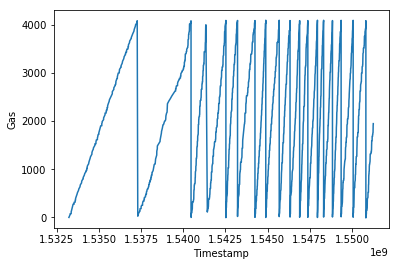

In [96]:
sns.lineplot(x='Timestamp', y='Gas', data=df)

Note that the gas consumption **counter reset several times**. This suggests that **the sensor was faulty**.

## Sensing Frequency

Sensors usually collect data at **frequent time intervals** (i.e., the time difference between two consecutive readings is constant).

In [97]:
df['timestamp_diff'] = df['Timestamp'].diff()
df['timestamp_diff'].describe()

count     40044.000000
mean        450.741584
std        3765.370922
min           0.000000
25%           9.000000
50%           9.000000
75%          10.000000
max      190922.000000
Name: timestamp_diff, dtype: float64

Based on the statistics, this sensor read data every 9 secs. This is not a standard choice. Let's dig more deeply:

In [98]:
s   = df['timestamp_diff'].value_counts()
sel = s>1

print('Repetitive intervals', len(s[sel]))
s[sel].sort_index().head(20)

Repetitive intervals 923


0.0       219
1.0        12
2.0         8
3.0       757
4.0      1097
5.0       348
6.0      1433
7.0        29
8.0      1265
9.0     18457
10.0    10383
11.0      275
12.0       26
13.0       14
14.0       14
15.0        2
16.0        9
17.0        4
18.0        5
19.0        5
Name: timestamp_diff, dtype: int64

As seen above, there are `923` different time intervals, and many of them repeat several times. This suggests that **the dataset contain too many errors and must be discarted**.

## ~The End